# Examples for plotting curves using MESA output files

Every MESA run outputs a bunch of files that you can use to study the evolution of the star(s) you evolved. To make things easy, there is a python tool made by Bill Wolf (https://github.com/wmwolf/py_mesa_reader) to read these output files and plot them as you wish.

This short notebook gives a few examples of how you can do this.

In [1]:
%matplotlib inline

In [2]:
#Import necessary libraries and mesa_reader

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

import mesa_reader as mr

In [3]:
#(Optional) You can set custom parameters for your plots to make them look good. 
# Parameters below are inspired by plots used in MESA instrument papers.

mpl.rcParams['figure.figsize'] = 8,6
mpl.rcParams['lines.markersize'] = 4
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['font.size'] = 12
mpl.rcParams['axes.titlesize'] = 'medium'
mpl.rcParams['axes.labelsize'] = 'medium'
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.frameon'] = 'false'
mpl.rcParams['figure.dpi'] = 300

mpl.rcParams['xtick.minor.visible'] = 'true'
mpl.rcParams['ytick.minor.visible'] = 'true'

mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.pad_inches'] = 0.1
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['savefig.format'] = 'pdf'

mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['xtick.top'] = 'true'
mpl.rcParams['ytick.direction'] = 'in'
mpl.rcParams['ytick.right'] = 'true'

mpl.rcParams['axes.formatter.use_mathtext'] = 'true'

In [4]:
# single star
path_to_dir = './SINGLE/LOGS/'
ss_h = mr.MesaData(path_to_dir + '/history.data') 
ss_p = mr.MesaData(path_to_dir +  '/profile1.data') #other profile files can also be loaded

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


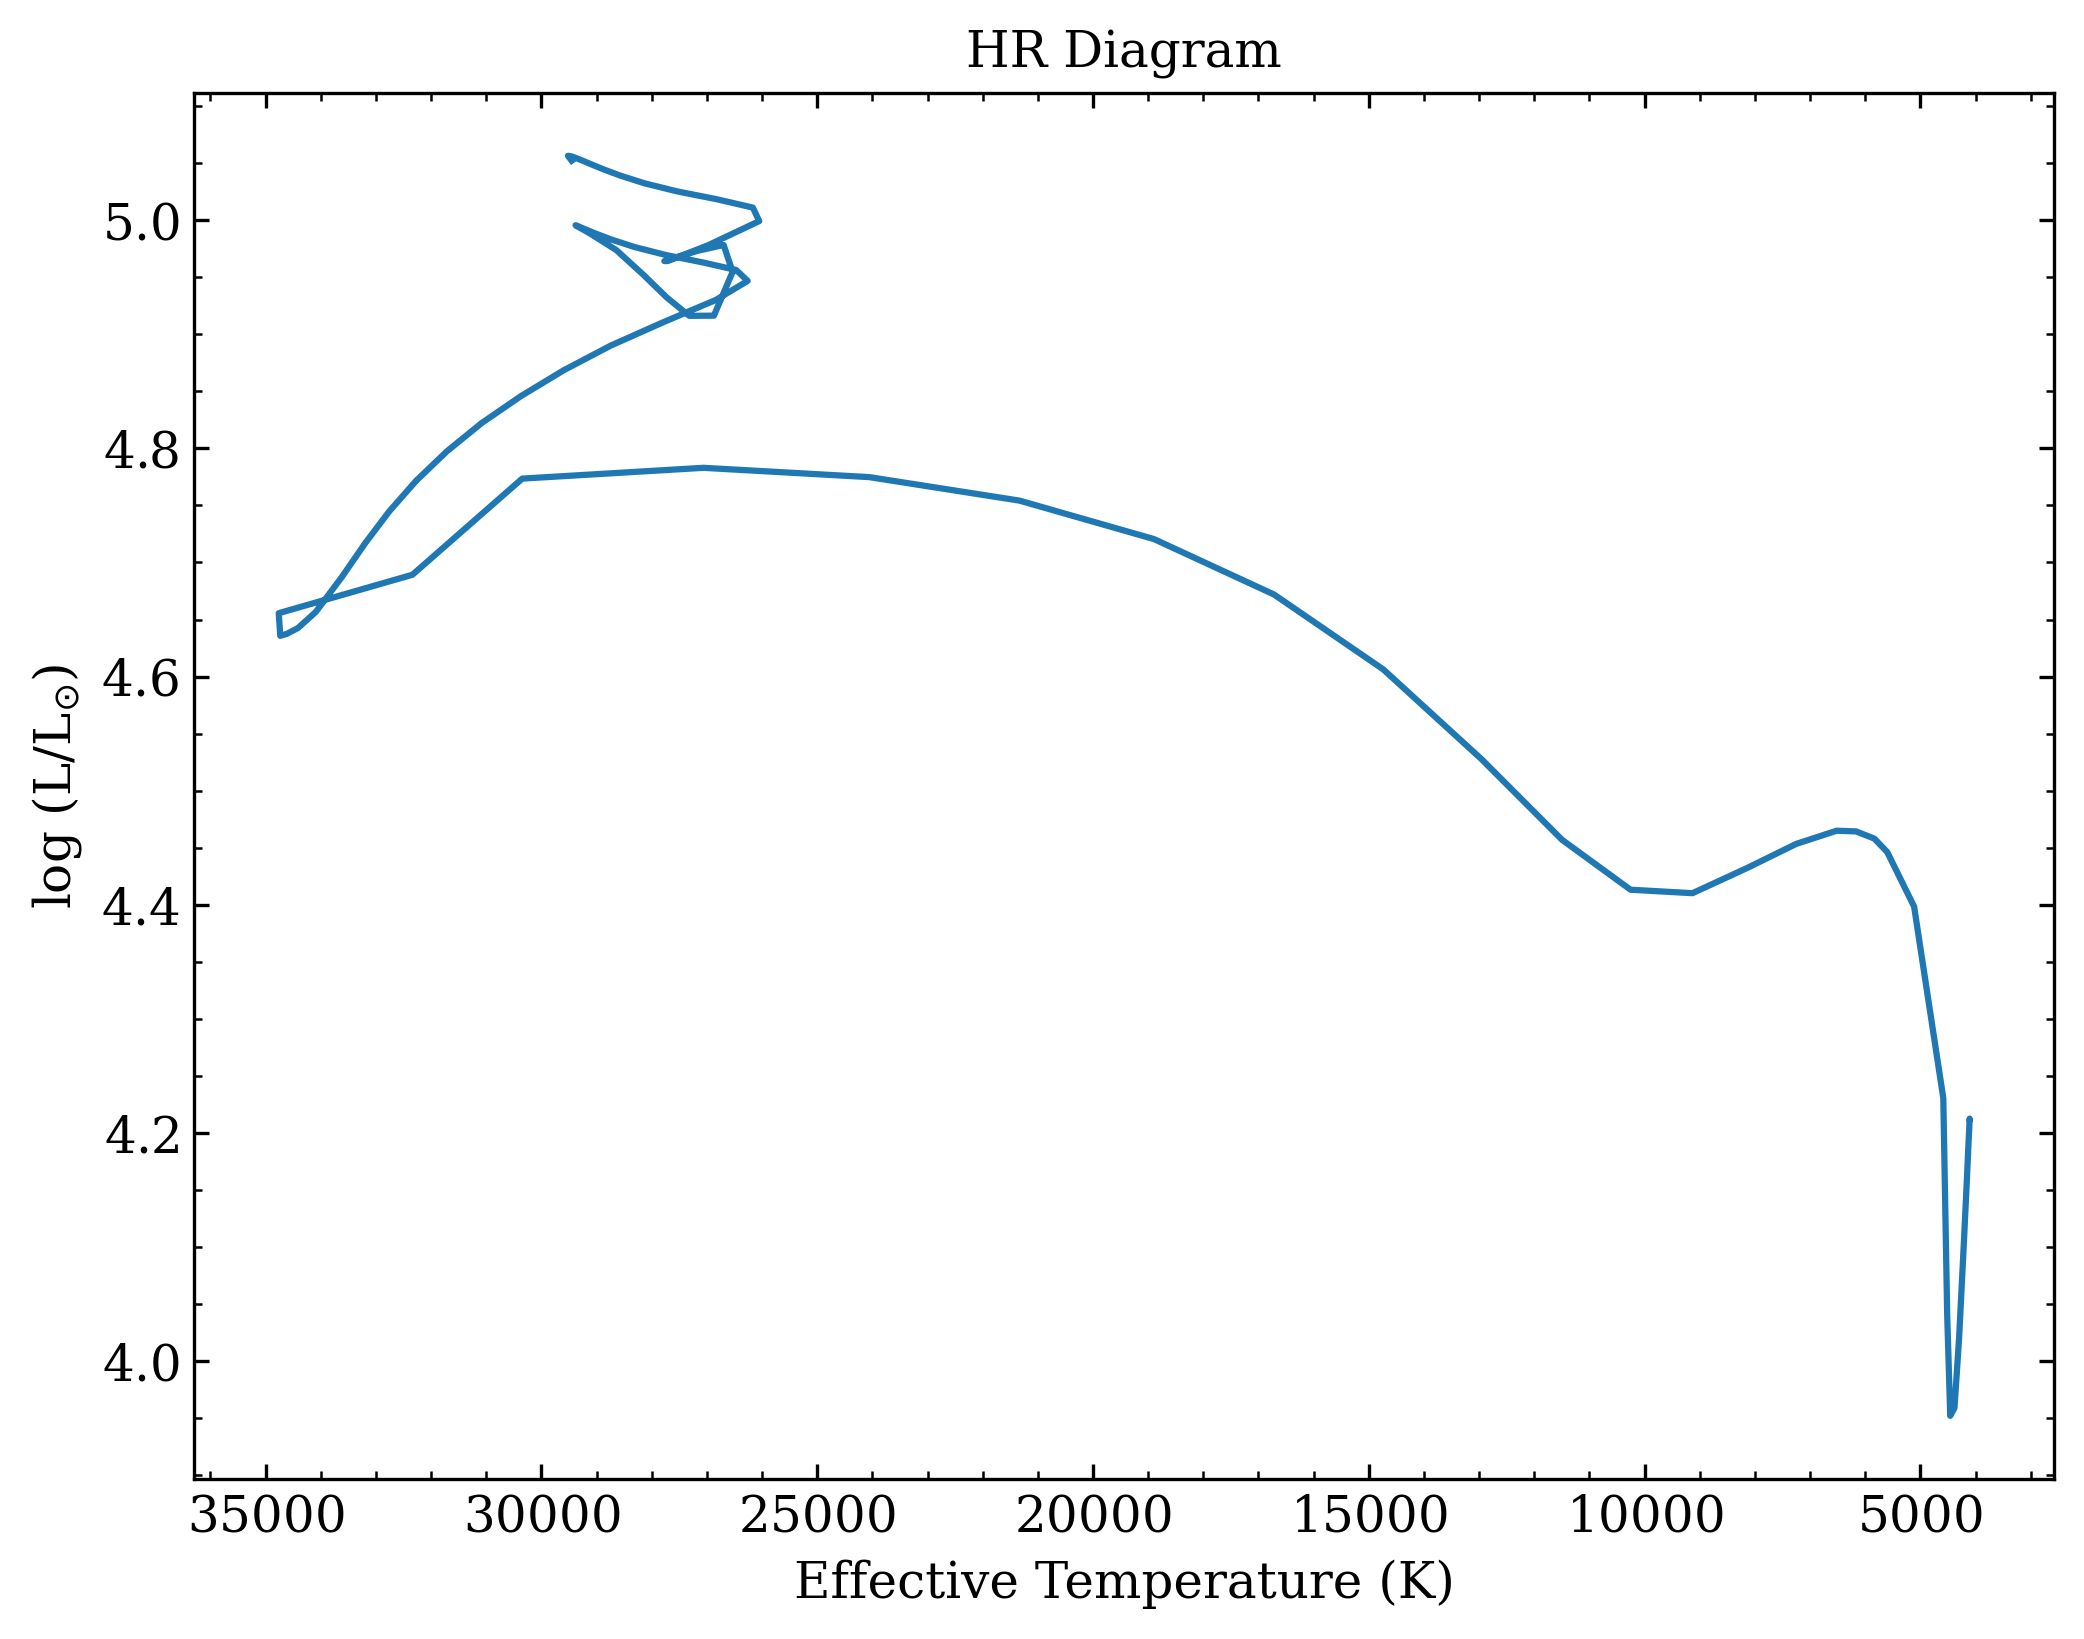

In [5]:
# plotting the time evolution of parameters : example - HR diagram

fig,ax = plt.subplots(1)

ax.plot(np.power(10,ss_h.log_Teff), ss_h.log_L, color='tab:blue')

plt.xlabel('Effective Temperature (K)')
plt.ylabel('log (L/L$_{\odot}$)')
plt.legend(fontsize=12)
plt.gca().invert_xaxis()

plt.title('HR Diagram')

plt.show()

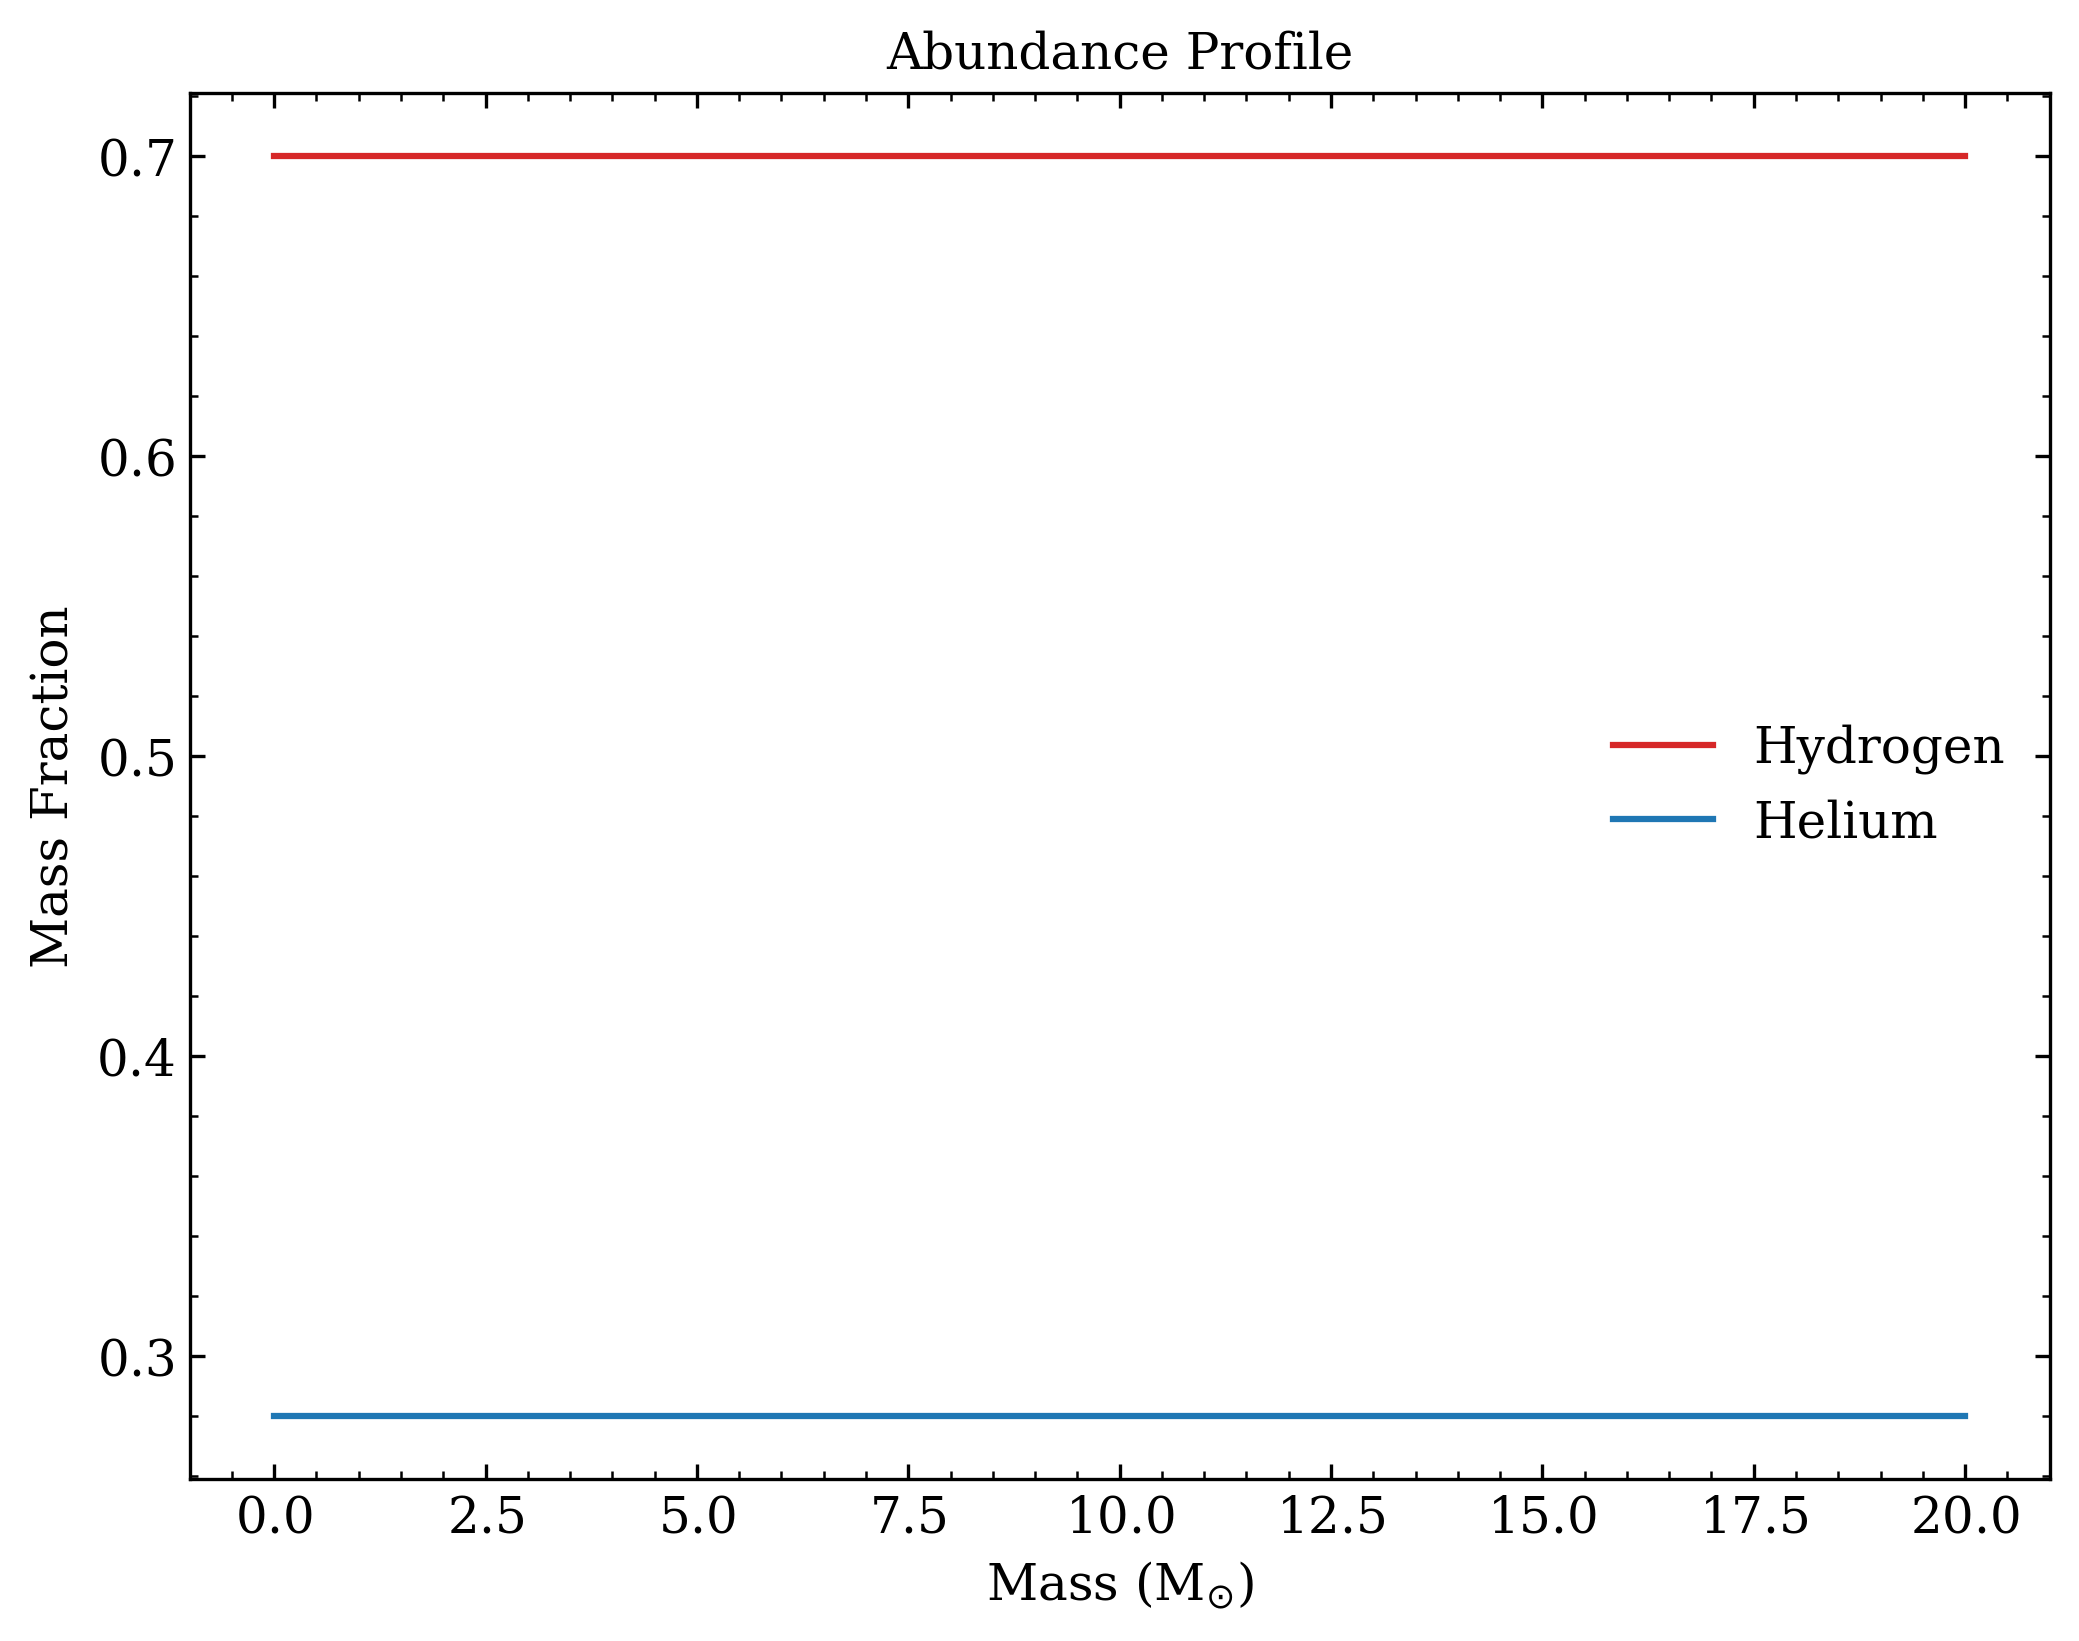

In [6]:
# plotting the profile at a specific time : example - Abundance profile

fig,ax = plt.subplots(1)

ax.plot(ss_p.mass, ss_p.x_mass_fraction_H, color='tab:red',label='Hydrogen')
ax.plot(ss_p.mass, ss_p.y_mass_fraction_He, color='tab:blue',label='Helium')

plt.xlabel('Mass (M$_{\odot}$)')
plt.ylabel('Mass Fraction')
plt.legend(fontsize=12)

plt.title('Abundance Profile')

plt.show()

In [11]:
# binary system - contains files for the binary as a whole, and for both individual stars

path_to_dir = './BINARY/'

b = mr.MesaData(path_to_dir + '/binary_history.data') 

b_sh1 = mr.MesaData(path_to_dir + 'LOGS1/history.data')
b_sh2 = mr.MesaData(path_to_dir + '/LOGS2/history.data') 

b_sp1 = mr.MesaData(path_to_dir + '/LOGS1/profile1.data') 
b_sp2 = mr.MesaData(path_to_dir + '/LOGS2/profile1.data') 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


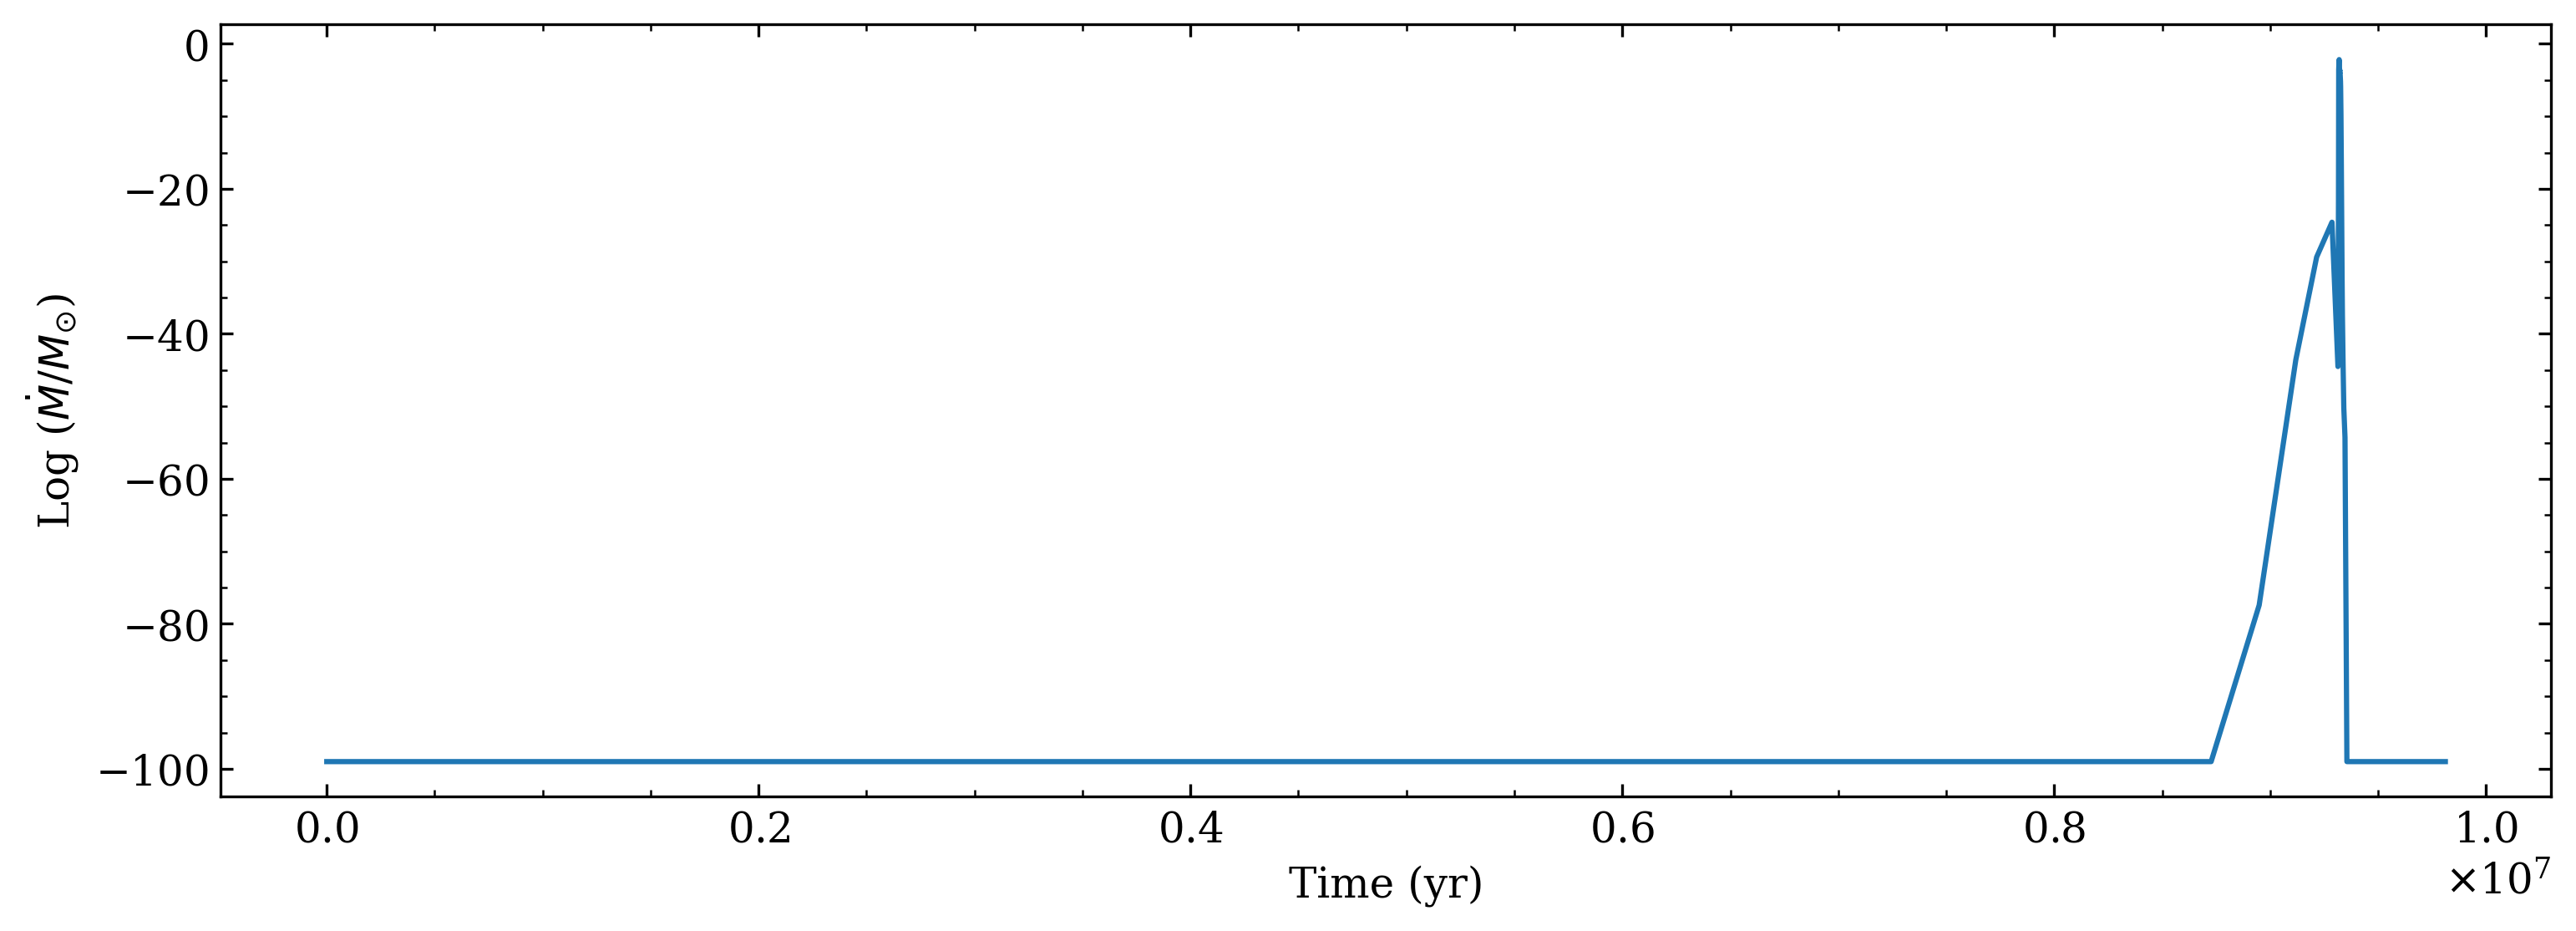

In [12]:
# plotting the evolution of a binary : example - Mass transfer

plt.figure(figsize=(12,4))

plt.plot(b.age, b.lg_mtransfer_rate, color='tab:blue')

plt.xlabel("Time (yr)")
plt.ylabel("Log ($\dot{M}$/$M_{\odot}$)")
plt.legend(fontsize=12)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


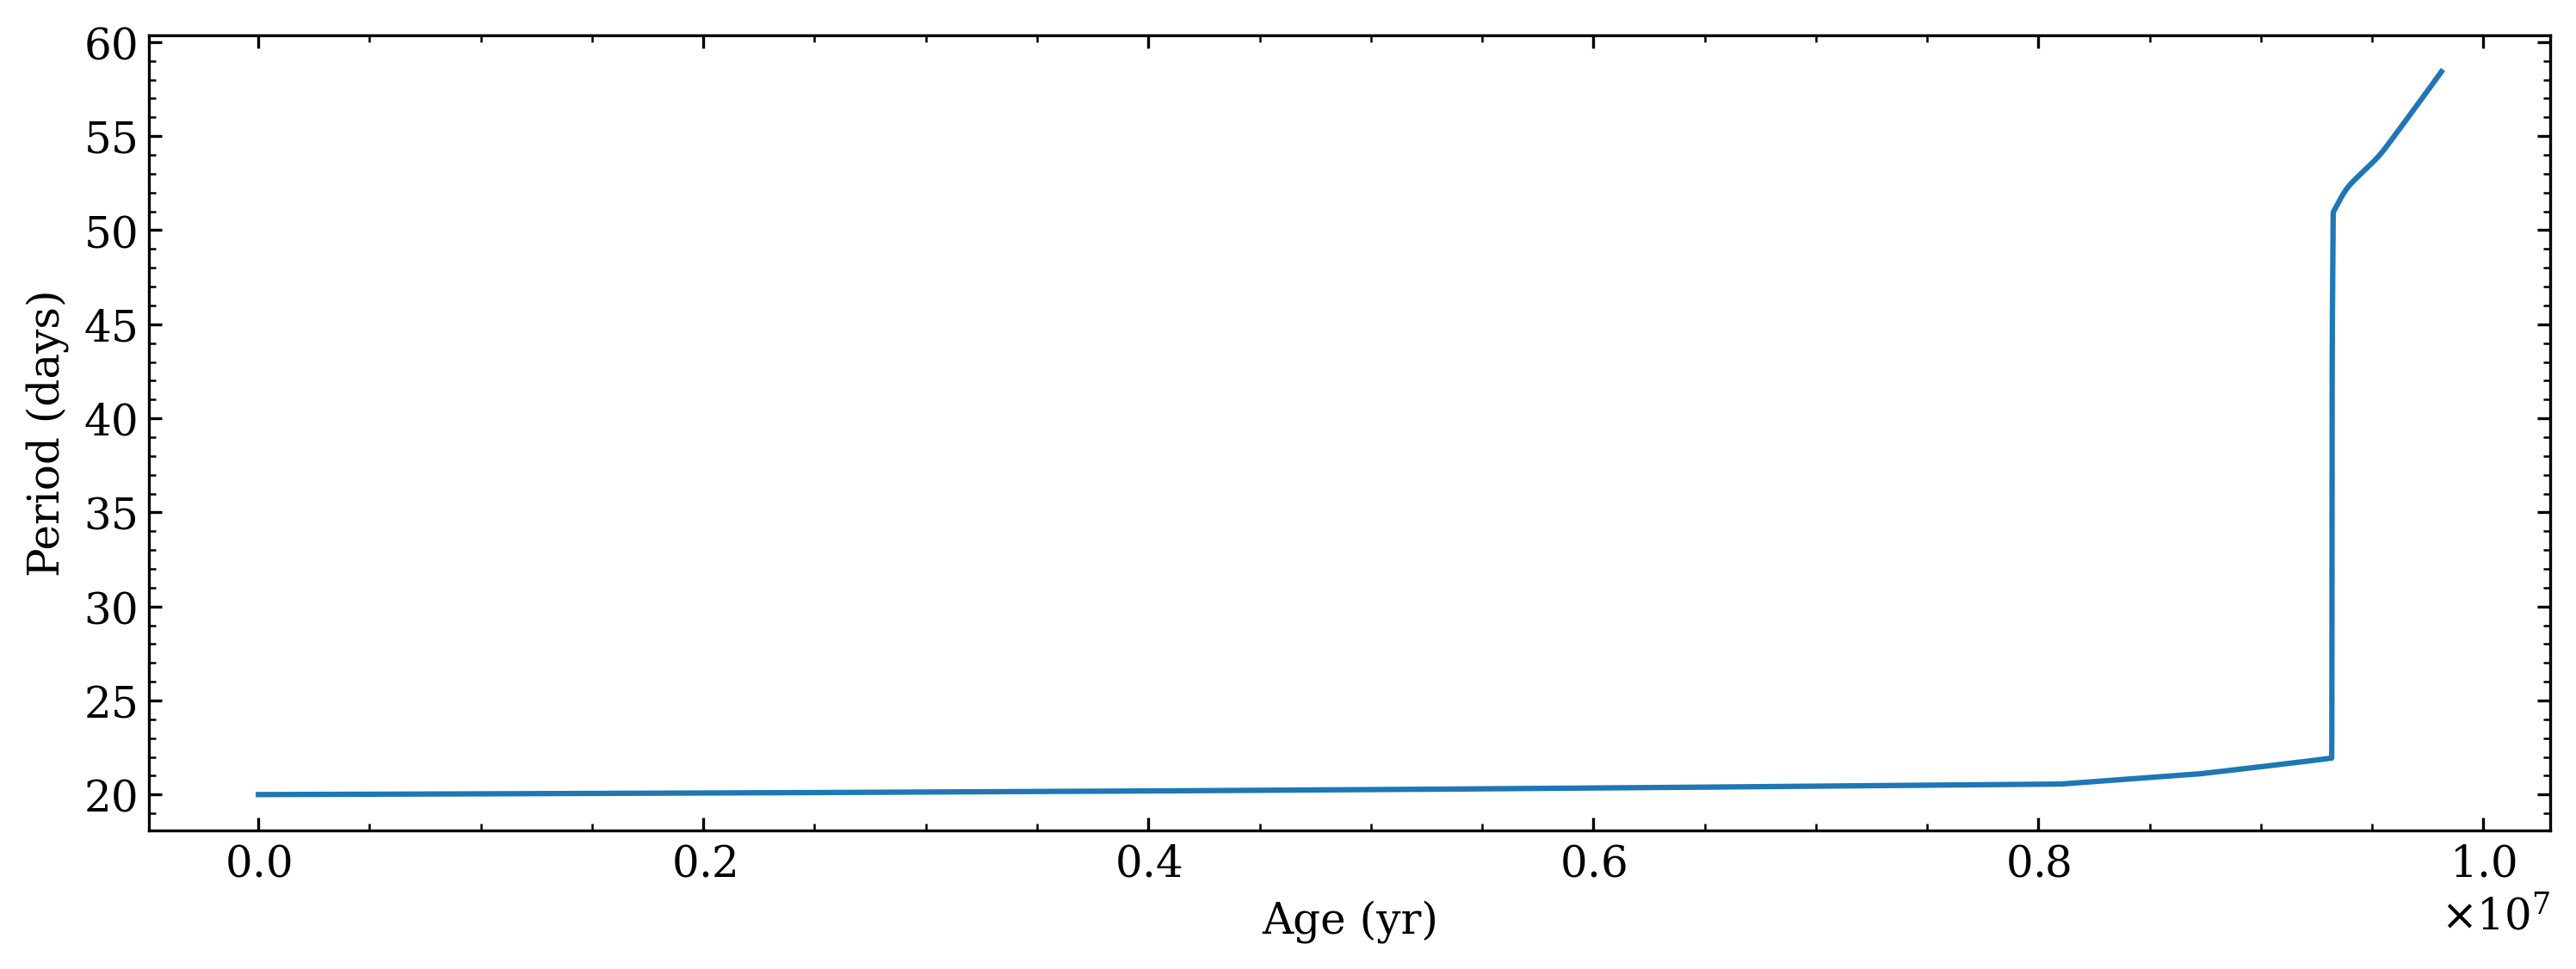

In [13]:
# plotting the evolution of a binary : example - Orbital period evolution

plt.figure(figsize=(12,4))

plt.plot(b.age, b.period_days, color='tab:blue')

plt.xlabel("Age (yr)")
plt.ylabel("Period (days)")
plt.legend(fontsize=12)

plt.show()